Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import pprint as pp
import pickle
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns

In [2]:
cancer=pd.read_csv("breast_cancer.csv")

In [3]:
cancer.shape

(569, 32)

In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
print(f"There are {len(cancer.columns)} in dataset & they are : ")
print()
pp.pprint(cancer.columns)

There are 32 in dataset & they are : 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [6]:
cancer.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [7]:
cancer.tail(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

In [8]:
cancer.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

In [9]:
cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
cancer.duplicated().sum()

0

In [11]:
def filter_column_types(cancer):
    
    numerical_cols = []
    categorical_cols = []

    for col in cancer.columns:
        
        if cancer[col].dtype in ['int64','int32','float32','float64']:
            numerical_cols.append(col)
            
        else:
            categorical_cols.append(col)
            
    return numerical_cols, categorical_cols
            
numerical_cols, categorical_cols = filter_column_types(cancer)

print("The numerical columns are : ")
print()
pp.pprint(numerical_cols)
print()
print()

print("The Categorical columns are : ")
print()
pp.pprint(categorical_cols)

The numerical columns are : 

['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


The Categorical columns are : 

['diagnosis']


String 'id' is not present in numerical_cols.


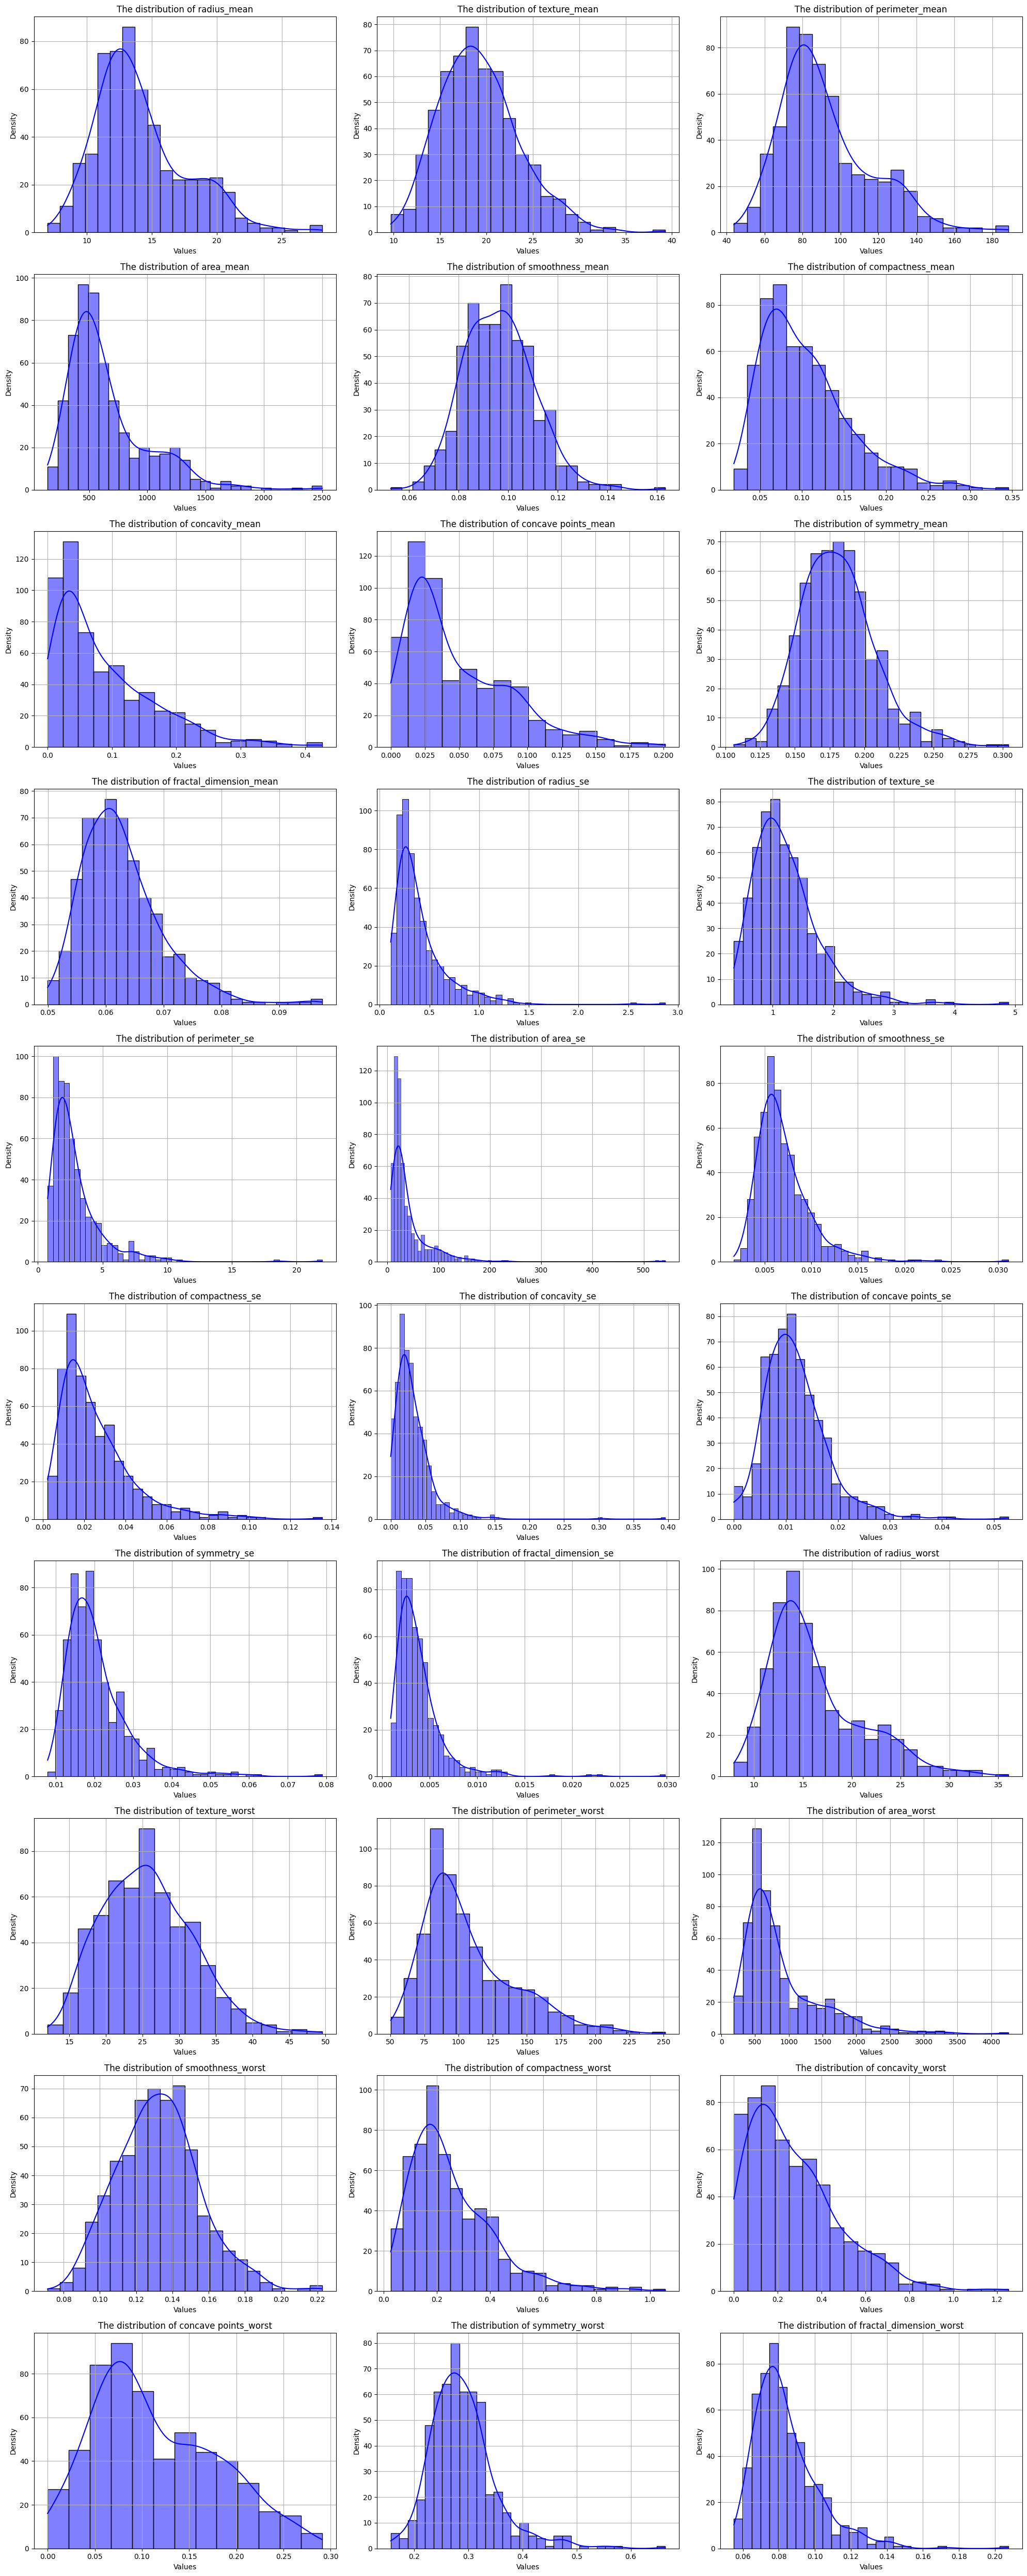

In [12]:
# Identify the numerical columns excluding 'id'
numerical_cols = [col for col in cancer.columns if col not in ['id', 'diagnosis']]
id_ = "id"
if id_ in numerical_cols:
    print("String 'id' is present in numerical_cols.")
else:
    print("String 'id' is not present in numerical_cols.")

# Set up the subplot grid
num_cols = len(numerical_cols)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Adjust the number of rows
fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms in each subplot
for i, col in enumerate(numerical_cols):
    sns.histplot(cancer[col], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f"The distribution of {col}")
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [13]:
cancer['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

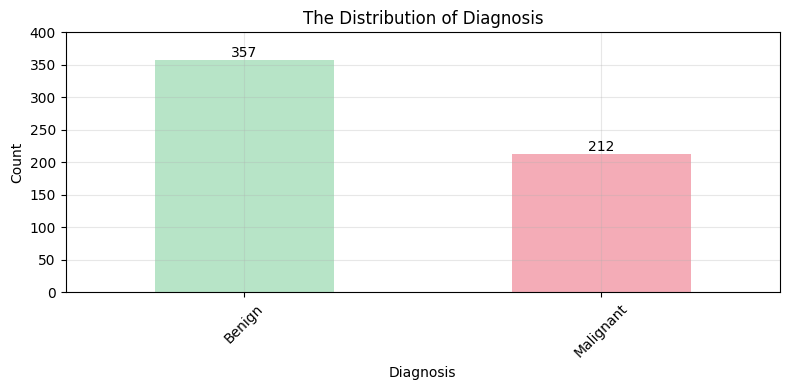

In [14]:
plt.figure(figsize=(8,4))

colors = ['#b7e4c7', '#f4acb7']

cancer['diagnosis'].value_counts().plot(kind='bar', color=colors)

plt.ylim(0,400)
plt.title(f"The Distribution of Diagnosis")
plt.xlabel('Diagnosis')
plt.ylabel('Count')

for i, count in enumerate(cancer['diagnosis'].value_counts()):
    plt.text(i, count, str(count), ha="center", va="bottom")
    
custom_labels = ['Benign', 'Malignant']  # Modify these labels as needed
plt.xticks( range(len(custom_labels)), custom_labels,rotation=45)
    
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
labelling = {'M':1, 'B':0}

cancer['diagnosis'] = cancer['diagnosis'].replace(labelling)

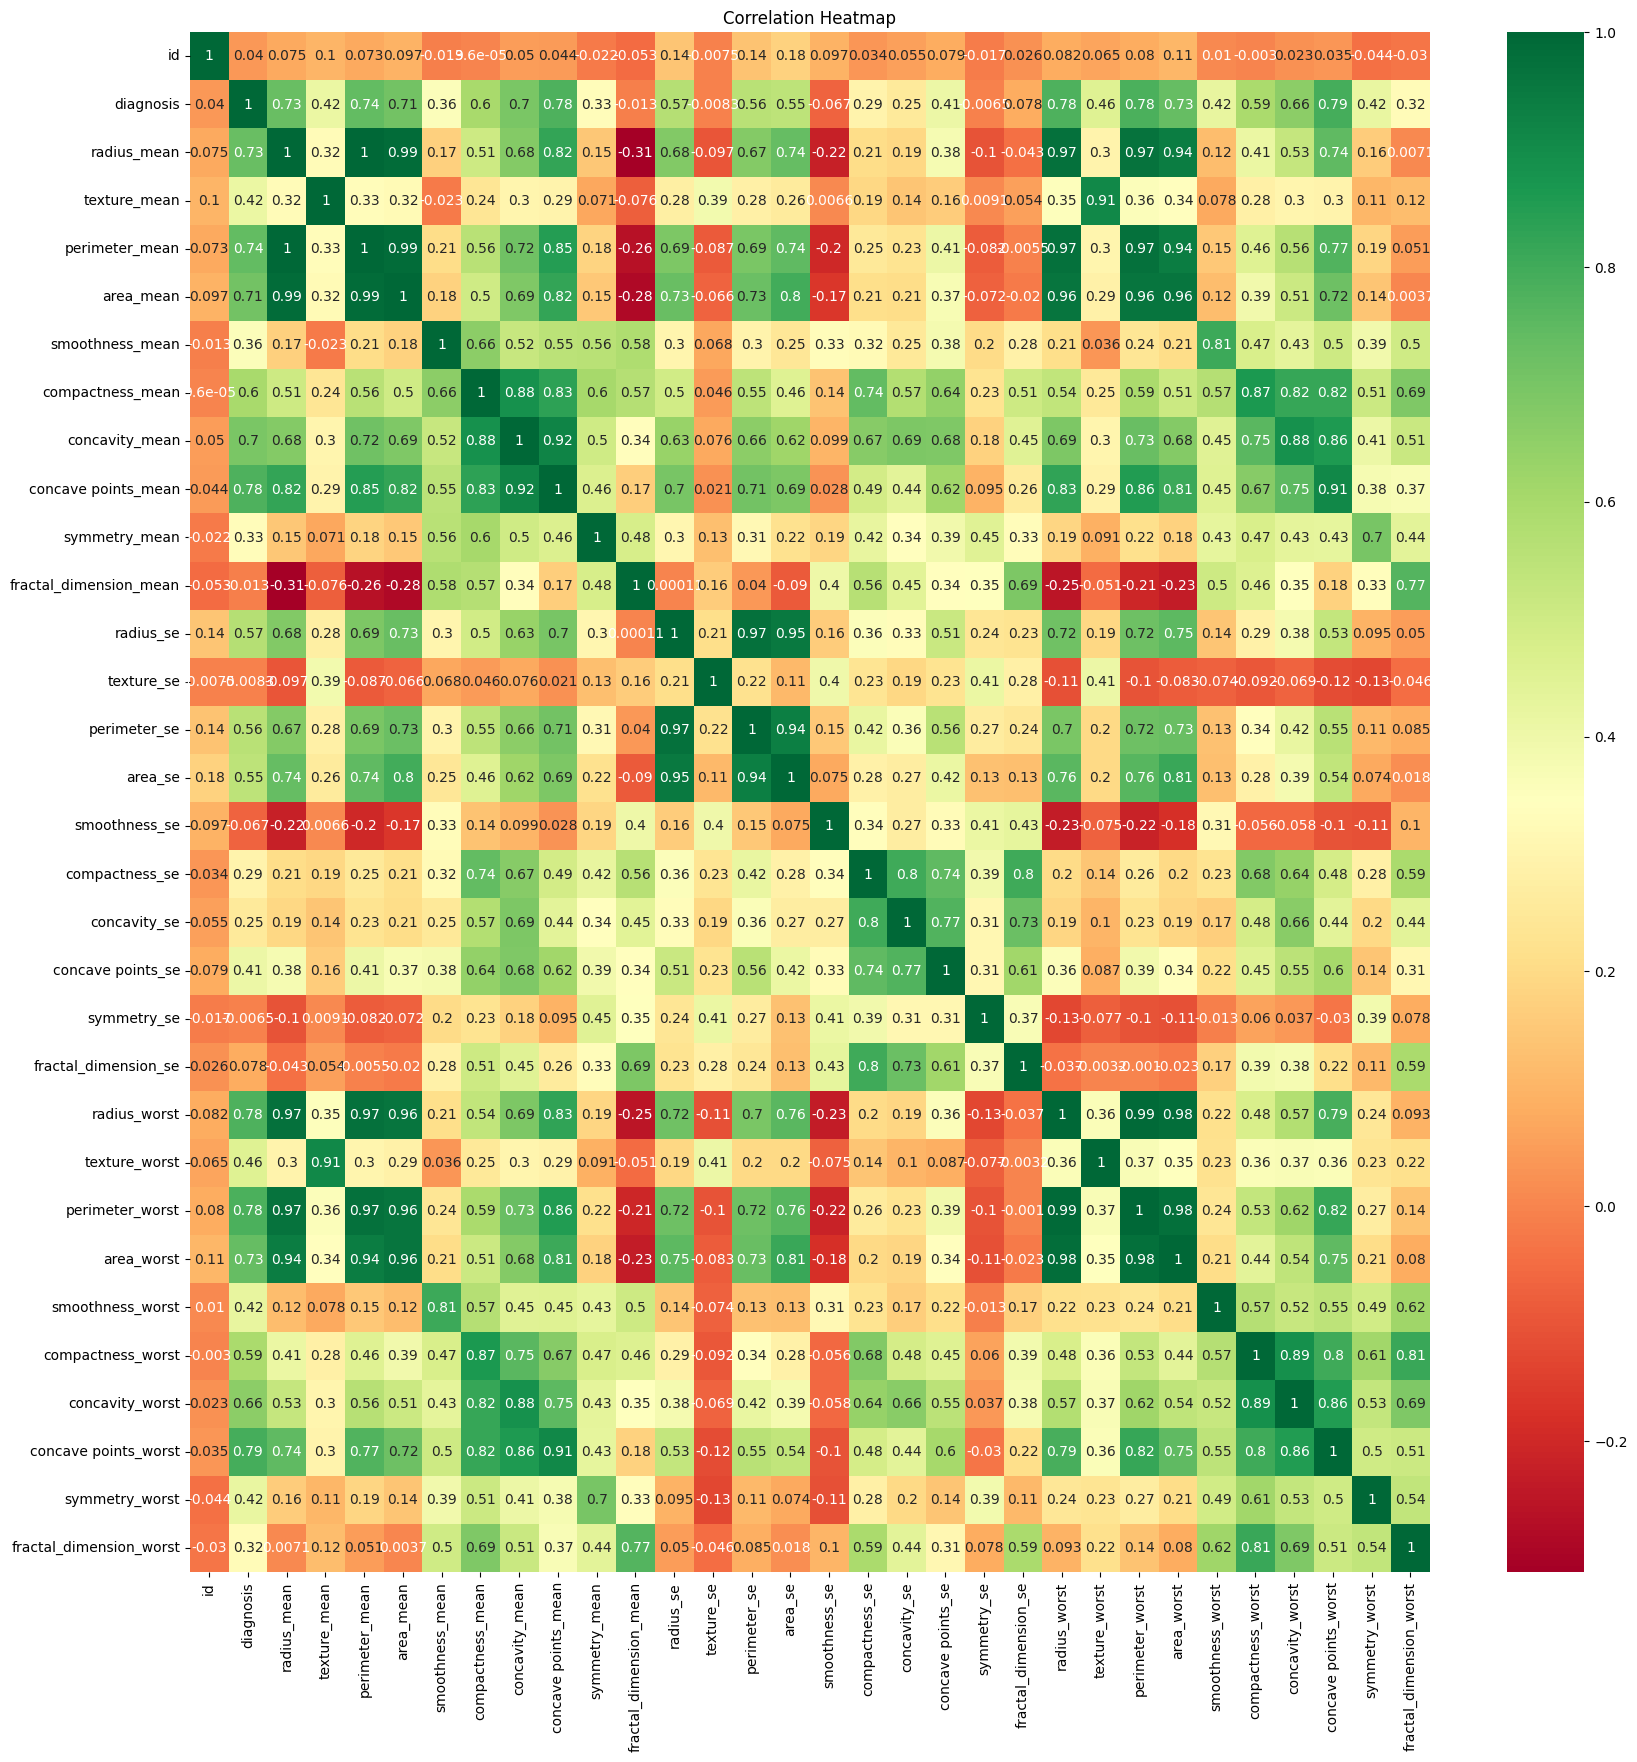

In [16]:
# heatmap
corrmap = cancer.corr()
top_corr_features = corrmap.index
plt.figure(figsize = (20,20))
x = sns.heatmap(cancer[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.title("Correlation Heatmap")
plt.show()

Boxplot 

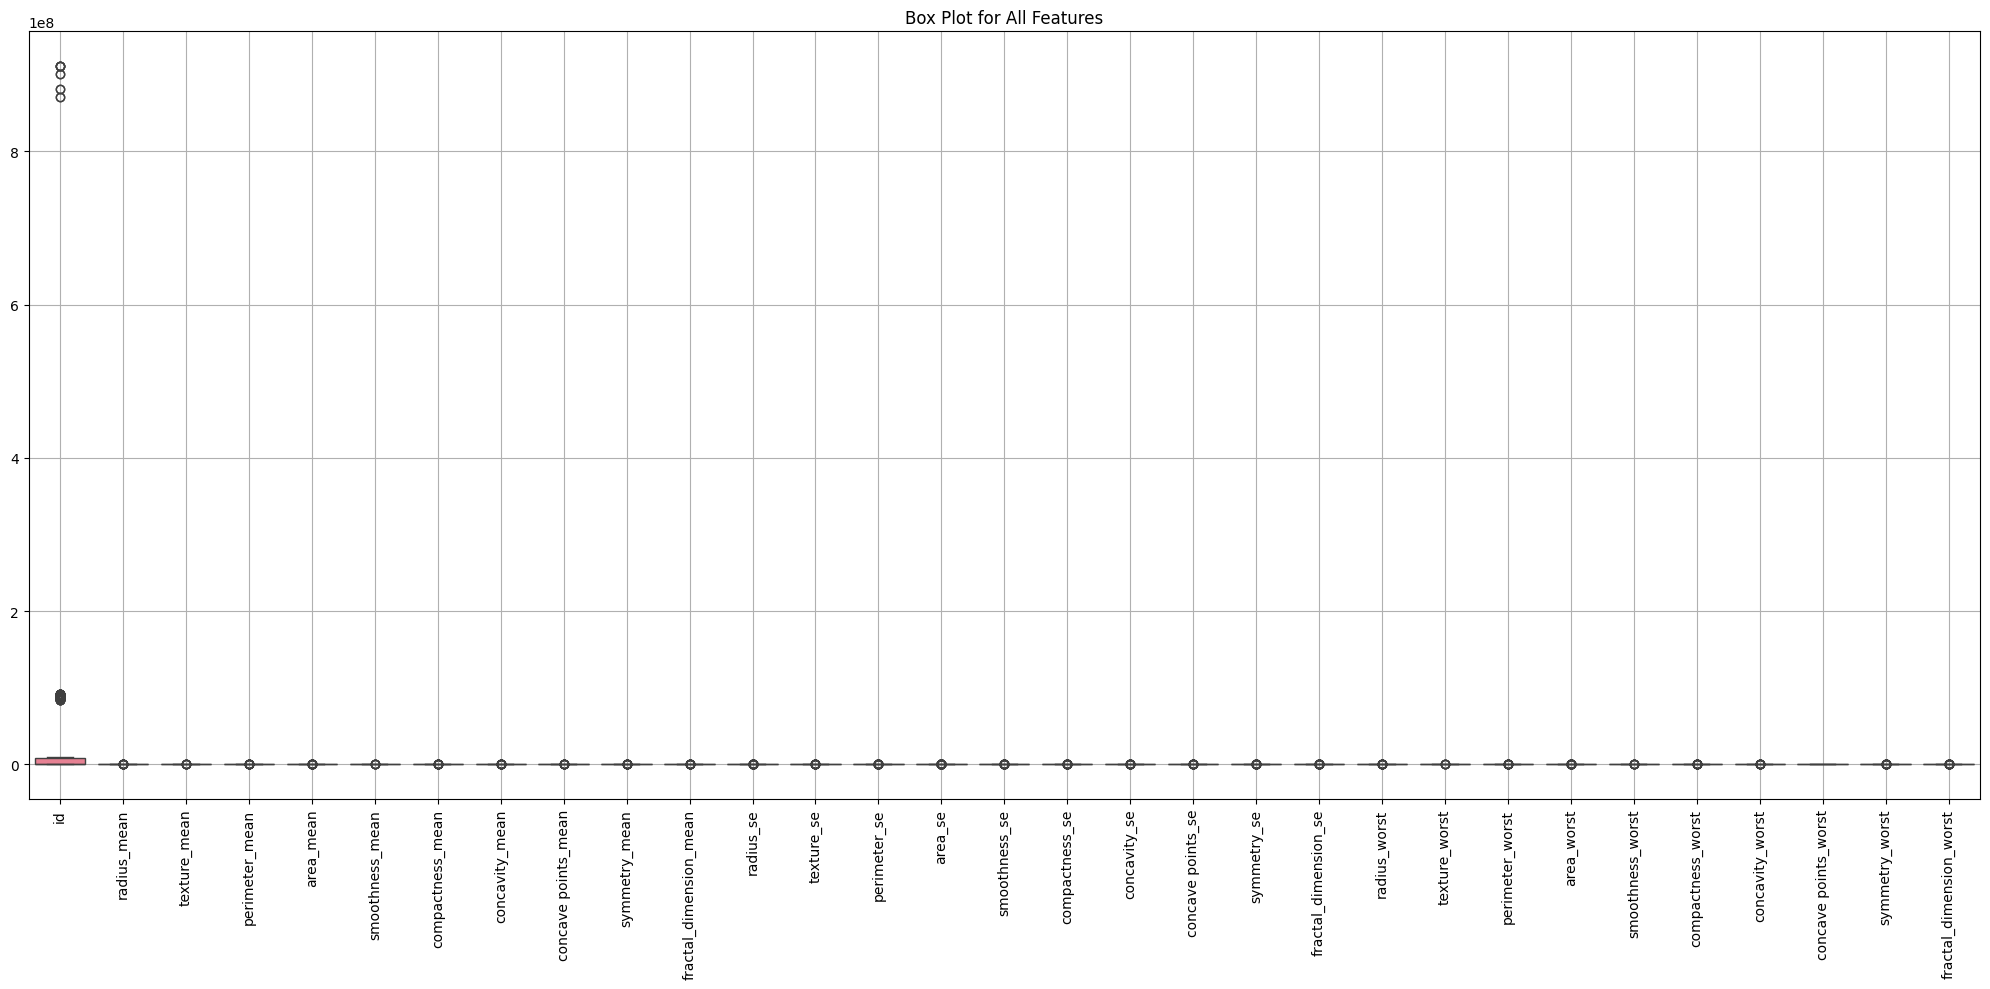

In [17]:
# Box Plot for all features
plt.figure(figsize=(20, 10))
sns.boxplot(data=cancer.drop('diagnosis', axis=1))
plt.title('Box Plot for All Features')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Outliers: The box plot reveals that several features contain outliers, indicated by the points that lie beyond the whiskers of the box plots.

Spread of Data: The spread of data (interquartile range) varies significantly across different features. Some features have a wider spread indicating more variability in the data.

Central Tendency: The median line inside each box gives us an idea of the central tendency of the features.

Violin Plot 

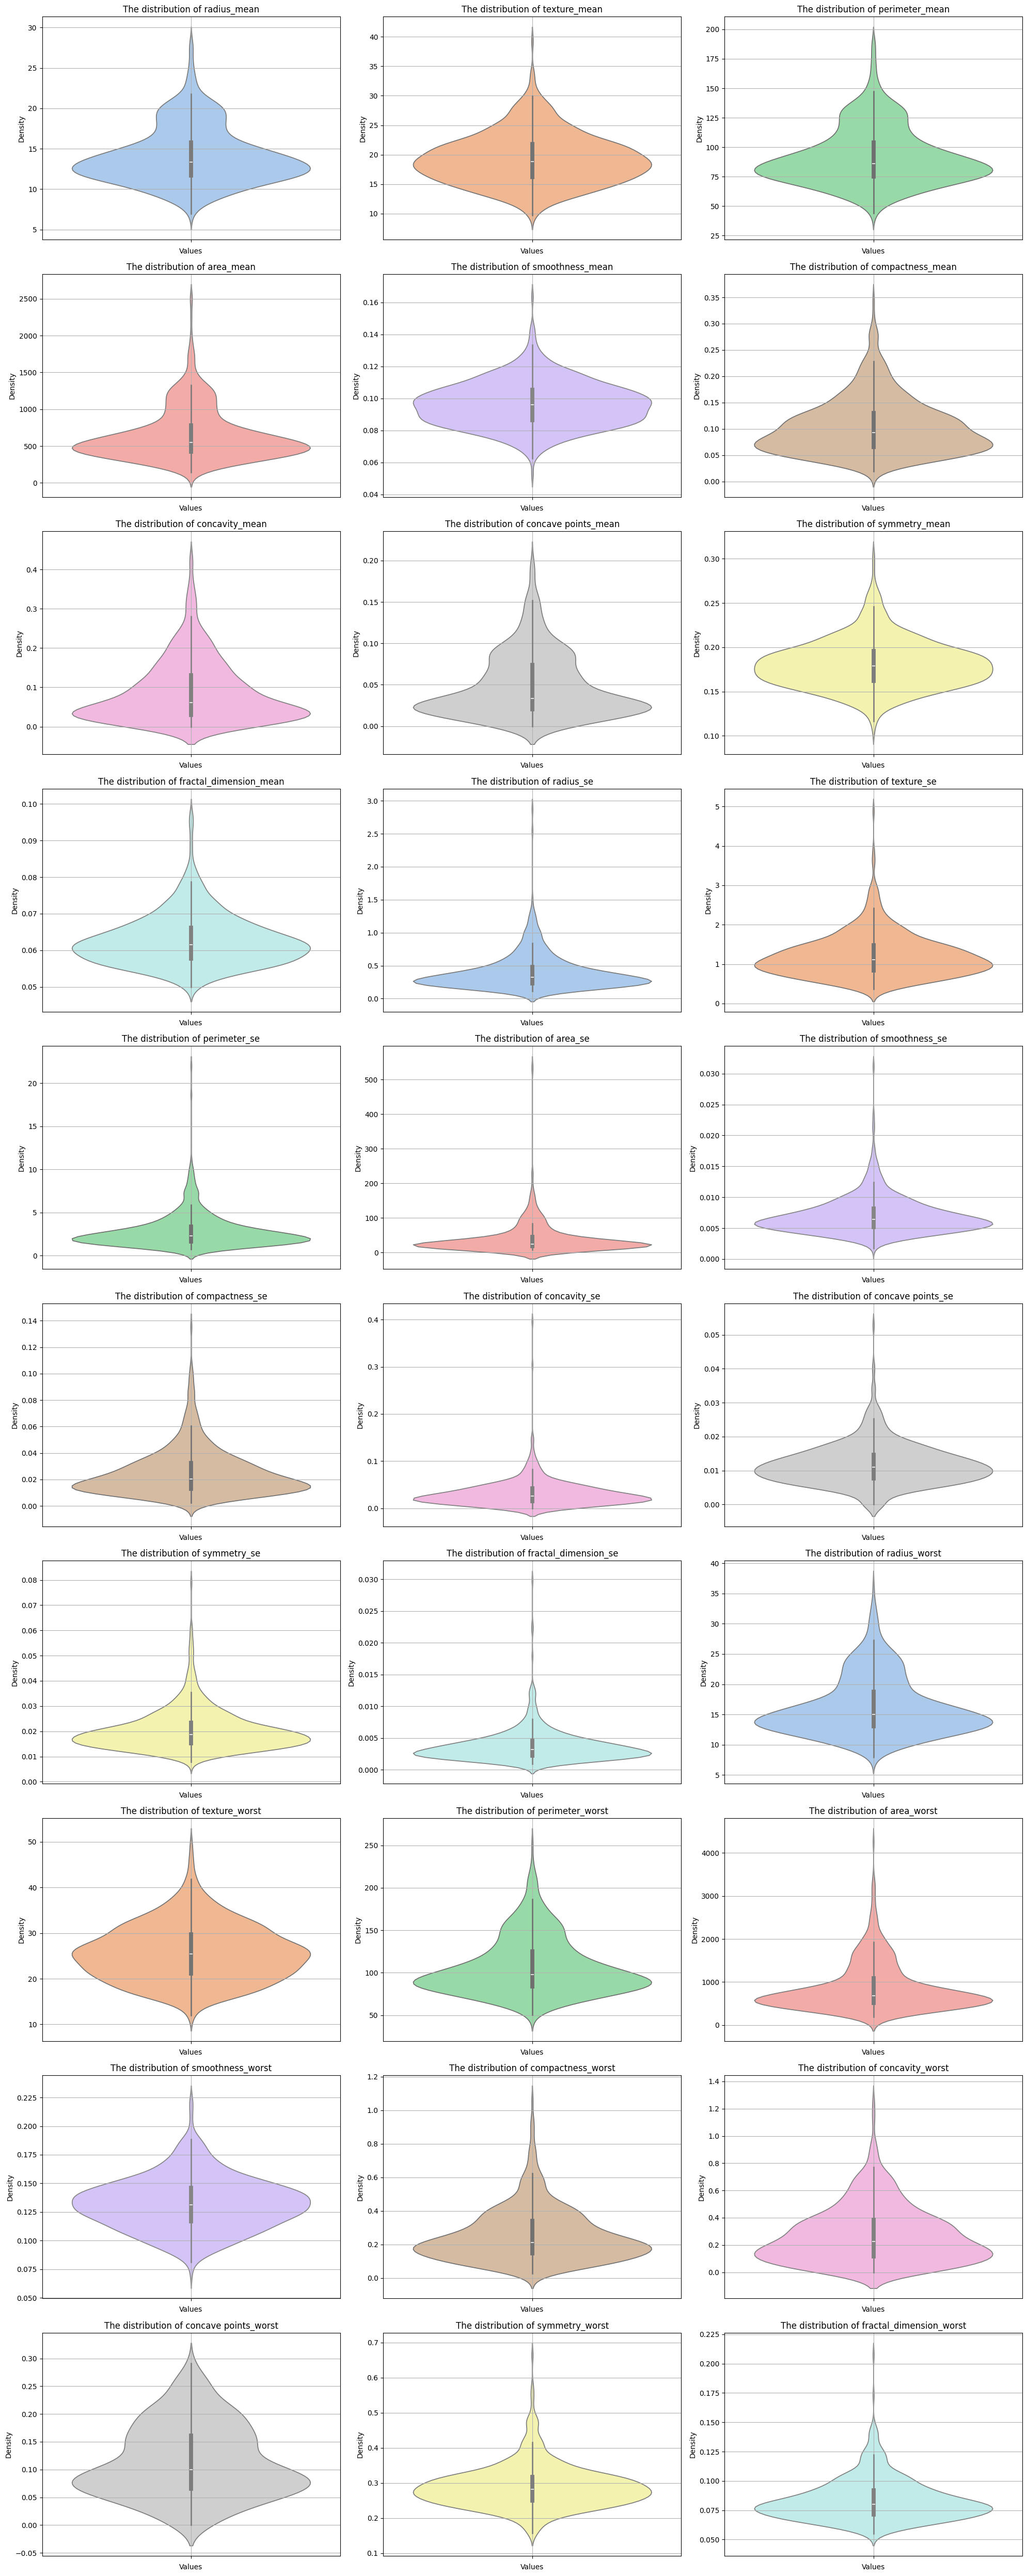

In [18]:
# Violin Plot for all features with light colors
fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a list of light colors
colors = sns.color_palette("pastel", num_cols)

# Plot violin plots in each subplot
for i, (col, color) in enumerate(zip(numerical_cols, colors)):
    sns.violinplot(y=cancer[col], ax=axes[i], color=color)
    axes[i].set_title(f"The distribution of {col}")
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


Distribution Shape: Violin plots provide insight into the distribution shape of each feature, showing whether the distribution is bimodal, unimodal, or multimodal.

Density: The width of each violin plot indicates the density of data points at different values. Features with wider sections have higher densities at those values.

Central Tendency: Similar to box plots, violin plots also show the central tendency but with more emphasis on the distribution around the median.

Histogram 

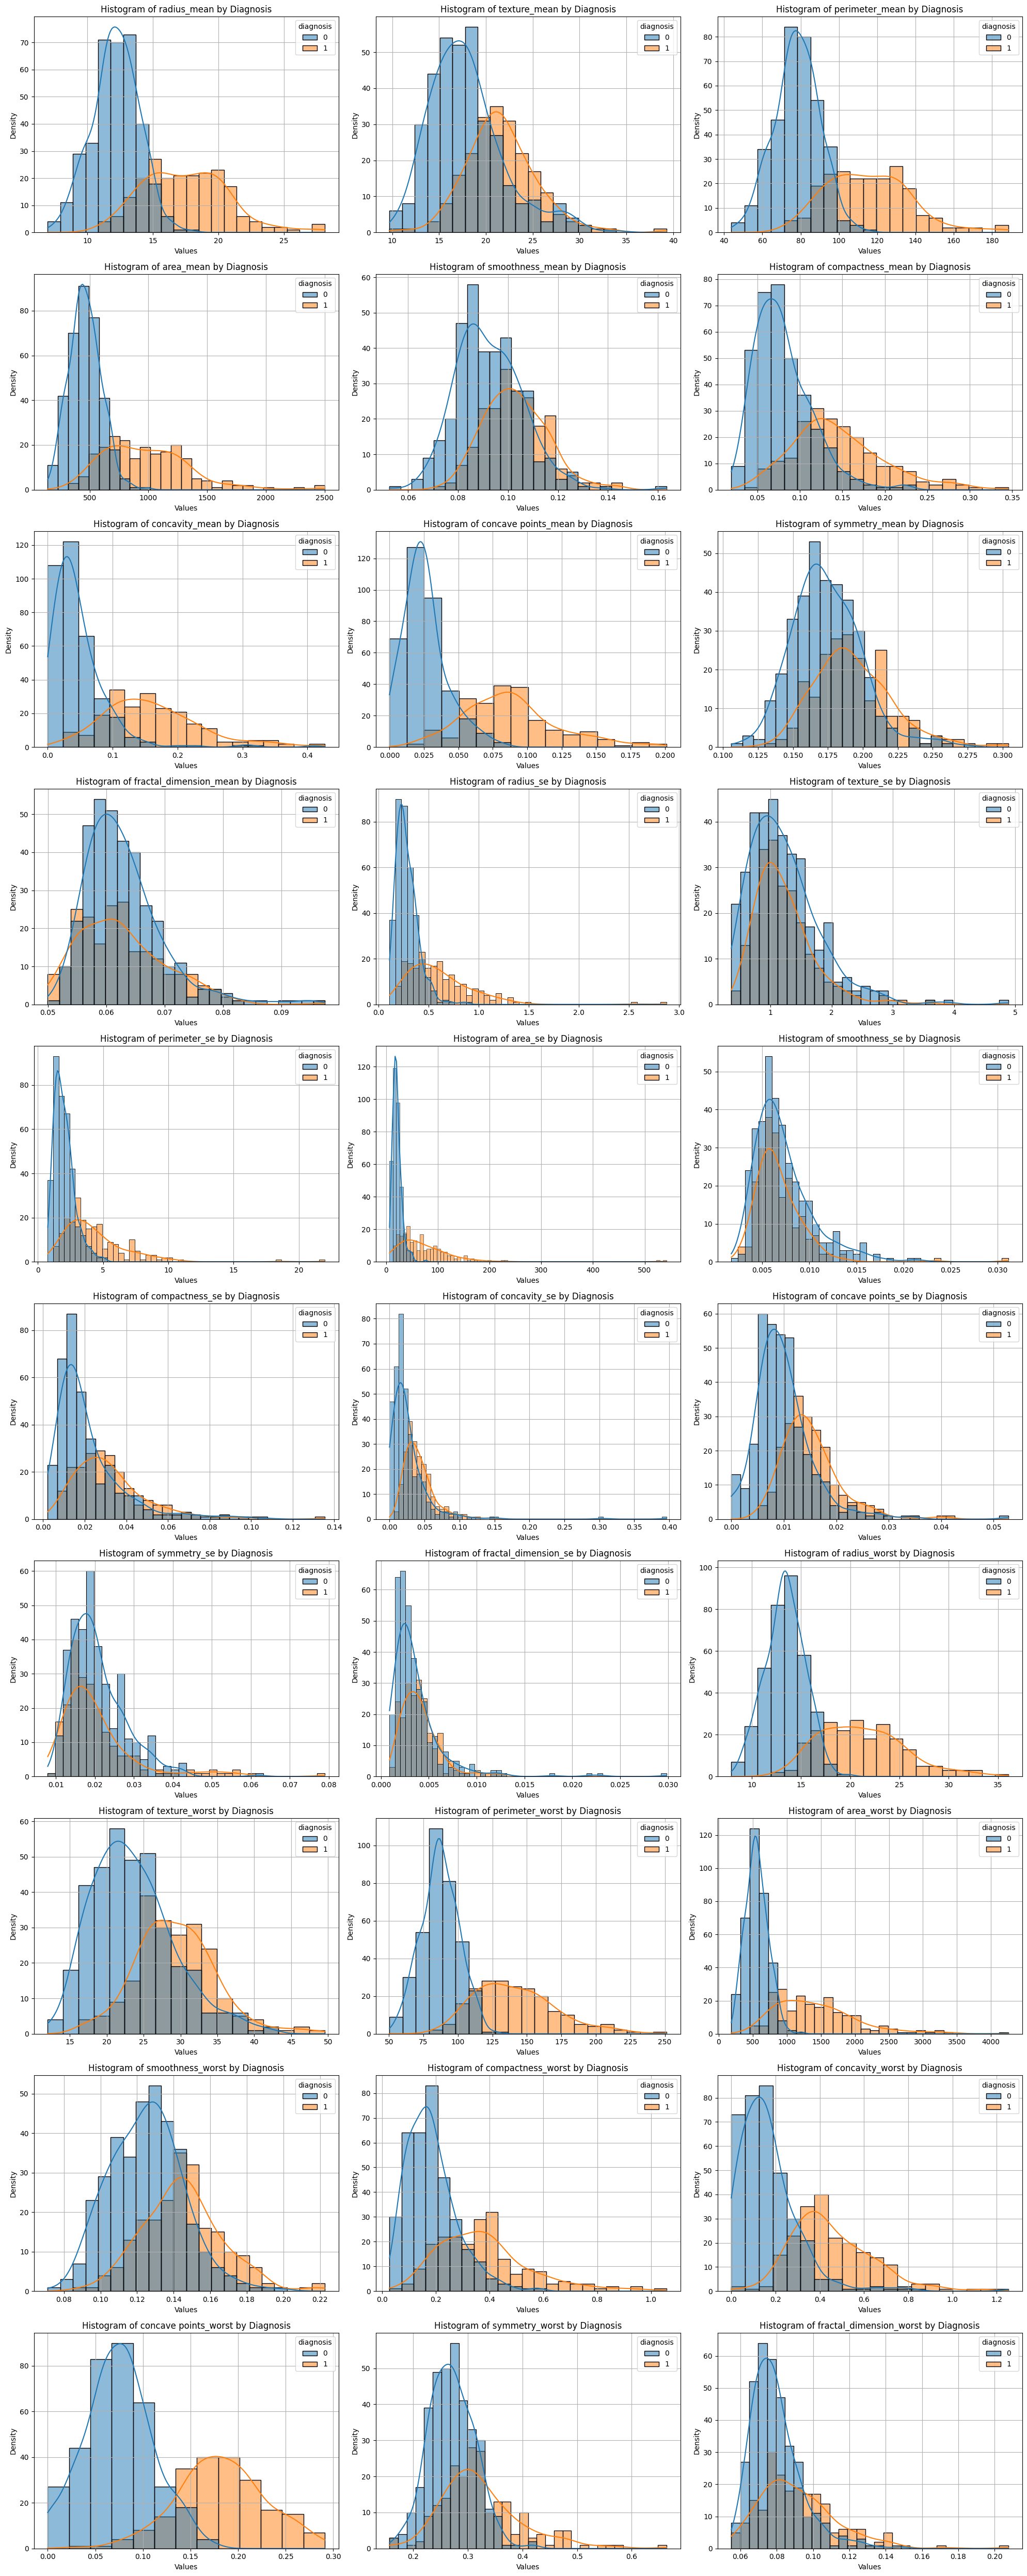

In [19]:
# Histogram for each feature against the diagnosis feature
num_cols = len(numerical_cols)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Adjust the number of rows
fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms in each subplot
for i, col in enumerate(numerical_cols):
    sns.histplot(data=cancer, x=col, hue='diagnosis', kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col} by Diagnosis")
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Class Separation: Histograms with the hue='diagnosis' parameter show the separation between benign and malignant cases for each feature. Features with clear separation indicate better discriminatory power.

Distribution Comparison: By comparing the distributions of benign (B) and malignant (M) cases, we can identify which features are more effective in distinguishing between the two classes.

Skewness: Some features may exhibit skewness, which can impact the performance of certain machine learning models.

Summary of Insights-:

Important Features: Features with a clear separation between benign and malignant cases in the histogram plots are crucial for the classification task. These include mean radius, mean texture, mean perimeter, mean area, etc.

Outliers and Variability: Box plots reveal that many features have outliers and varying degrees of variability, which may need to be addressed during preprocessing.

Distribution Shape: Violin plots show that the shape of the distributions for many features is not always normal, indicating potential issues for algorithms that assume normally distributed data.

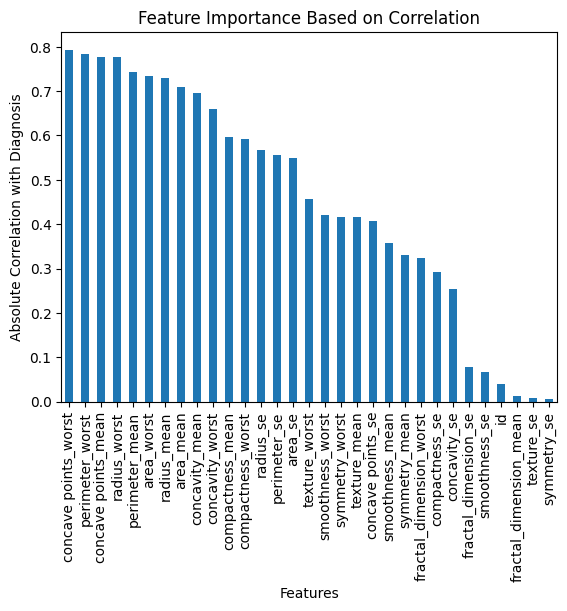

In [20]:
correlation_with_target = cancer.corr()['diagnosis'].abs().sort_values(ascending=False)

correlation_with_target.drop('diagnosis').plot(kind='bar')
plt.title('Feature Importance Based on Correlation')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Diagnosis')
plt.xticks(rotation=90)
plt.show()

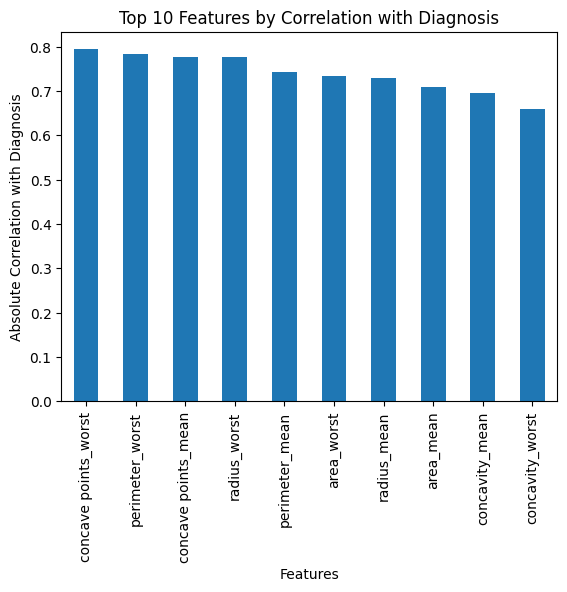

In [21]:
correlation_with_target = cancer.corr()['diagnosis'].abs().sort_values(ascending=False)
top_10_features = correlation_with_target.drop('diagnosis').head(10)
top_10_features.plot(kind='bar')
plt.title('Top 10 Features by Correlation with Diagnosis')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Diagnosis')
plt.xticks(rotation=90)
plt.show()

In [22]:
top_10_features = correlation_with_target.drop('diagnosis').head(10)
df_top_10 = cancer[top_10_features.index]

In [23]:
cancer

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
564              0.13890  ...        25.450          26.40           166.10   
565              0.09791  ...        23.690          38.25           155.00   
566              0.05302  ...        18.980          34.12           126.70   
567              0.15200  ...        25.740          39.42           184.60   
568              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0

In [24]:
cancer['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [25]:
cancer.drop('id', axis=1, inplace=True)

In [26]:
cols_to_standardize = [col for col in cancer.columns if "diagnosis" not in col]
len(cols_to_standardize)
cols_to_standardize

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [27]:
rs = RobustScaler()
for col in cols_to_standardize:
    cancer[col] = rs.fit_transform(cancer[[col]])
cancer.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     1.132353     -1.502664        1.263740   1.241446   
1          1     1.764706     -0.190053        1.612859   2.138245   
2          1     1.549020      0.428064        1.512617   1.798841   
3          1    -0.477941      0.273535       -0.299343  -0.455298   
4          1     1.696078     -0.799290        1.688904   2.058223   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.190174          2.824832        2.358711             2.115850   
1        -0.587956         -0.213653        0.250742             0.682995   
2         0.725304          1.027337        1.343287             1.758242   
3         2.463286          2.921045        1.778327             1.335444   
4         0.234020          0.613470        1.349219             1.318681   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       1.855030  ...      1.801038      -0.935185         2.105595   
1       0.059172  ...      1.733564      -0.231481         1.480746   
2       0.819527  ...      1.487889       0.013889         1.328167   
3       2.381657  ...     -0.010381       0.126157         0.029305   
4       0.050296  ...      1.309689      -1.011574         1.320901   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.343063          1.051020           2.364252         1.807750   
1    2.232284         -0.255102          -0.131839         0.055514   
2    1.797960          0.445578           1.107869         0.833458   
3   -0.208897          2.670068           3.410109         1.714605   
4    1.562335          0.207483          -0.035956         0.645678   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              1.715248        2.635556                 1.884578  
1              0.892194       -0.106667                 0.435500  
2              1.483052        1.171852                 0.365664  
3              1.633358        5.653333                 4.508244  
4              0.648595       -0.678519                -0.158099  

[5 rows x 31 columns]

Model Building 

In [28]:
from sklearn.model_selection import train_test_split

X = cancer.drop("diagnosis", axis = 1)
y = cancer["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.125 ,random_state=42)

KNN

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
knn_accuracy =accuracy_score(y_test, y_pred)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.96      0.93      0.94        27

    accuracy                           0.96        72
   macro avg       0.96      0.95      0.96        72
weighted avg       0.96      0.96      0.96        72



In [30]:
from sklearn.metrics import confusion_matrix
# Define the plot_confusion_matrix function
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {title}')
    plt.tight_layout()
    plt.show()

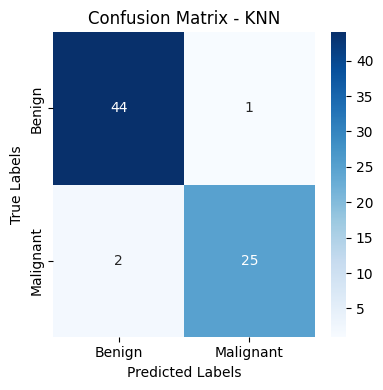

In [31]:
plot_confusion_matrix(y_test, knn_model.predict(X_test), 'KNN')

Naive Bayes

In [32]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
nb_accuracy =accuracy_score(y_test, y_pred)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        45
           1       0.93      0.93      0.93        27

    accuracy                           0.94        72
   macro avg       0.94      0.94      0.94        72
weighted avg       0.94      0.94      0.94        72



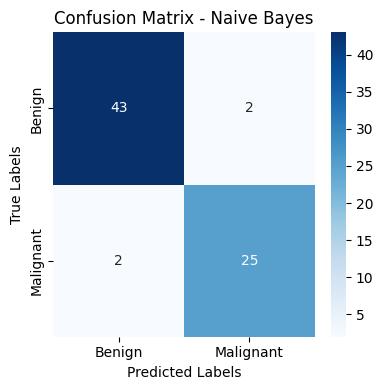

In [33]:
# Naive Bayes
plot_confusion_matrix(y_test, nb_model.predict(X_test), 'Naive Bayes')

Logistic regression 

In [34]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

y_pred = lg_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.96      0.98        27

    accuracy                           0.99        72
   macro avg       0.99      0.98      0.99        72
weighted avg       0.99      0.99      0.99        72



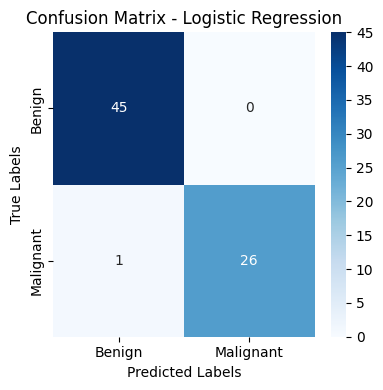

In [35]:
# Logistic Regression
plot_confusion_matrix(y_test, lg_model.predict(X_test), 'Logistic Regression')

SVM

In [36]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.96      0.98        27

    accuracy                           0.99        72
   macro avg       0.99      0.98      0.99        72
weighted avg       0.99      0.99      0.99        72



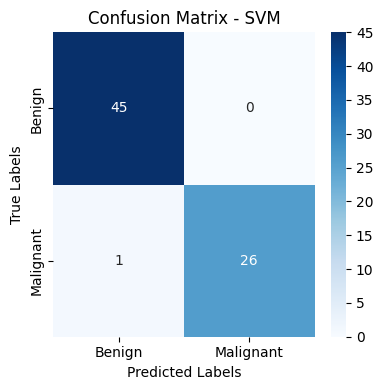

In [37]:
# SVM
plot_confusion_matrix(y_test, svm_model.predict(X_test), 'SVM')

In [38]:



# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42)
}

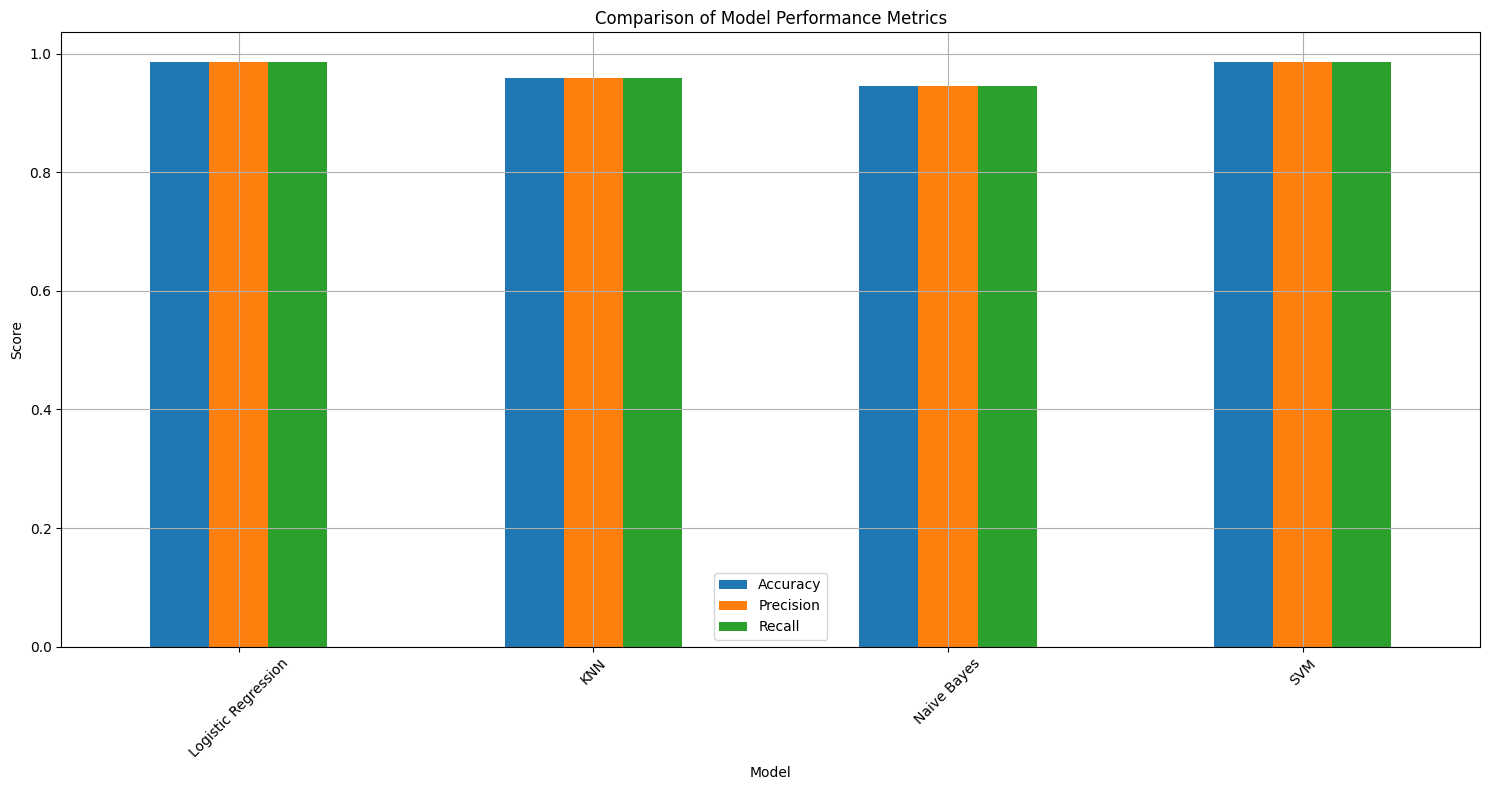

In [39]:
# Initialize dictionaries to store the metrics
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': []}

# Train models and collect metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)

# Append metrics
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(report['weighted avg']['precision'])
    metrics['Recall'].append(report['weighted avg']['recall'])

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot comparison of metrics
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(15, 8))
plt.title('Comparison of Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
# Choose the best model based on accuracy
best_model_name = metrics_df['Accuracy'].idxmax()
best_model = models[best_model_name]

# Save the best model to a .pkl file
with open(f'best_model_{best_model_name}.pkl', 'wb') as file:
     pickle.dump(best_model, file)

print(f'The best model is {best_model_name} with an accuracy of {metrics_df["Accuracy"].max()}')

The best model is Logistic Regression with an accuracy of 0.9861111111111112


So the model which i chose is logistic regression based on the results of aacuracy , precision and recall.